In [5]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import math

# Distance hyperbolique

In [13]:
def arcosh(x):
    return np.log(x+math.sqrt(x**2-1))

In [447]:
"""def distance_hyper(coor1,coor2):
    t=2*coor1[2]*coor2[2]
    #print(1+((((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))/t)+(((coor1[2]-coor2[2])**2)/t))
    return arcosh(1+((((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))/t)+(((coor1[2]-coor2[2])**2)/t))
"""
"""def distance_hyper(coor1,coor2):
    t=2*coor1[2]*coor2[2]
    d=(((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))
    
    #comp=((coor2[2]/coor1[2])+(coor1[2]/coor2[2]))/(d*2)   
    comp=(coor1[2]-coor2[2])**2
    print(t)
    return arcosh(1+(d/t)+(comp/(t)))"""

def distance_hyper2(coor1,coor2):
    t=2*coor1[2]*coor2[2]
    d=(((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))
    
    #comp=((coor2[2]/coor1[2])+(coor1[2]/coor2[2]))/(d*2)   
    comp=(coor1[2]-coor2[2])**2
    return arcosh(1+(d/t)+(comp/(t*d)))

def distance_hyper_gama(coor1,coor2,gama):
    t=2*coor1[2]*coor2[2]
    return arcosh(1+((((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))/t)+(((coor1[2]-coor2[2])**2)/t))

In [90]:
coor1=(1,10,90000)
coor2=(5,11,10)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

9.104979858417122


6.275312266945166

In [91]:
coor1=(1,10,9)
coor2=(5,11,10)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

0.4435682543851153


0.4319977464552794

In [93]:
coor1=(1,10,90000)
coor2=(5,11,89999)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

4.714071307629269e-05


4.5891730058413135e-05

In [94]:
coor1=(100,1000,90000)
coor2=(5,11,10)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

9.105101718770873


1.0083706665594059

In [99]:
coor1=(100,1000,9)
coor2=(5,11,10)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

9.302946891896921


9.30294587906175

In [100]:
coor1=(100,1000,90000)
coor2=(5,11,10)
print(distance_hyper(coor1,coor2))
distance_hyper2(coor1,coor2)

9.105101718770873


1.0083706665594059

# Traitement Données

In [250]:
loc_lille=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
loc=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
del(loc['LocInfo'])

In [216]:
traffic_lille=pd.read_csv("Lille/Lille2.csv")
print(traffic_lille)

                   CellID           TimeSlot        ByteUp        ByteDn
0        0002f81013073f26   2019-03-19 18:10  2.687867e+03  1.829448e+04
1        0102f8100065e968   2019-03-19 18:10  5.484555e+03  5.017041e+03
2        0102f81000658688   2019-03-19 18:10  2.998657e+05  3.305069e+06
3        0102f8100065501b   2019-03-19 18:10  9.605082e+05  4.142277e+06
4        0102f8100065d31c   2019-03-19 18:10  1.299698e+06  1.886555e+07
...                   ...                ...           ...           ...
6580983  8102f8100001435e   2019-06-16 00:00  8.579147e+03  2.112294e+05
6580984  8102f81000014389   2019-06-16 00:00  0.000000e+00  0.000000e+00
6580985  8102f8100001435c   2019-06-16 00:00  1.802890e+03  6.350155e+04
6580986  0102f81000652c54   2019-06-16 00:00  1.358283e+05  7.055754e+03
6580987  8102f8100001438a   2019-06-16 00:00  1.979265e+04  5.928641e+05

[6580988 rows x 4 columns]


In [245]:
d={}
for t in range(len(traffic_lille)):
    id=traffic_lille['CellID'][t]
    tm=traffic_lille[' TimeSlot'][t]
    if(id in d.keys()):
        date=tm[1:11]
        heur=tm[12:17]
        if(date not in d[id].keys()):
            d[id][date]={}
        d[id][date][heur]=(traffic_lille[' ByteUp'][t],traffic_lille[' ByteDn'][t])
    else:
        d[id]={}

Enlever les rrh pour lesquel il n y a pas de trafic

In [343]:
"""supp=[]
dict_loc_id={}
les_X=[]
les_Y=[]
for i in range(len(loc_lille)):
    k=loc_lille['LocInfo'][i]
    if(k in d.keys()):
        l=(loc_lille[' Coord_X'][i],loc_lille[' Coord_y'][i])
        d[k]['loc']=l
        if(l not in dict_loc_id.keys()):
            dict_loc_id[l]=k
            les_X.append(loc_lille[' Coord_X'][i])
            les_Y.append(loc_lille[' Coord_y'][i])
        else:
            supp.append(k)
    else:#on supp ceux qui n'ont pas de trafic
        supp.append(k)"""
date='2019-03-22'
heurQQ='12:00'
supp=[]
dict_loc_id={}
dict_loc_traf={}
les_X=[]
les_Y=[]
for i in range(len(loc_lille)):
    k=loc_lille['LocInfo'][i]
    if(k in d.keys()):
        l=(loc_lille[' Coord_X'][i],loc_lille[' Coord_y'][i])
        d[k]['loc']=l
        if(l not in dict_loc_id.keys()):
            if(date in d[k].keys()):
                if(heurQQ in d[k][date].keys()):
                    dict_loc_traf[l]=d[k][date][heurQQ][1]
                    dict_loc_id[l]=k
                    les_X.append(loc_lille[' Coord_X'][i])
                    les_Y.append(loc_lille[' Coord_y'][i])
        else:
            supp.append(k)
    else:#on supp ceux qui n'ont pas de trafic
        supp.append(k)
        

In [344]:

data_ss_double = {' Coord_X': les_X, ' Coord_y': les_Y}
data_ss_double = pd.DataFrame(data=data_ss_double)
data_ss_double

,Coord_X,Coord_y
0,651625,2626995
1,653420,2625730
2,650285,2625320
3,653200,2626680
4,651170,2626500
...,...,...
73,650935,2627960
74,652300,2627300
75,651510,2627170
76,652308,2625601


In [267]:
loc

,Coord_X,Coord_y
0,651625,2626995
1,652120,2627118
2,653420,2625730
3,648111,2624325
4,650285,2625320
...,...,...
1389,648250,2627725
1390,652584,2626121
1391,653189,2625159
1392,651000,2624075


In [268]:
print(les_X)

[651625, 653420, 650285, 653200, 651170, 651406, 652026, 648111, 649038, 649945, 651098, 651944, 652584, 647676, 648321, 650820, 651551, 651562, 652390, 653371, 652599, 652358, 652476, 649075, 654455, 654173, 650935, 651915, 652545, 651274, 648250, 648834, 654333, 650859, 649293, 650618, 651063, 649540, 649910, 651687, 649883, 650557, 653189, 652130, 652995, 654306, 648100, 651000, 652991, 651276, 651474, 652950, 651088, 652134, 650318, 647802, 650240, 651608, 652120, 653550, 650949, 650518, 653925, 651479, 649520, 652510, 650255, 651280, 650290, 652308, 647760, 651456, 652220, 653717, 650935, 652300, 651510, 652120, 651304]


In [269]:
print(les_Y)

[2626995, 2625730, 2625320, 2626680, 2626500, 2627092, 2627499, 2624325, 2624599, 2628465, 2628298, 2627126, 2626121, 2624629, 2626961, 2626560, 2626608, 2627093, 2628500, 2627901, 2626161, 2625557, 2627334, 2628175, 2625300, 2626165, 2627068, 2627795, 2626328, 2626780, 2627725, 2626412, 2626507, 2627530, 2627302, 2625539, 2626087, 2626350, 2624150, 2626012, 2625775, 2628274, 2625159, 2626870, 2624140, 2627341, 2625537, 2624075, 2628272, 2625339, 2626770, 2627325, 2627789, 2625843, 2625134, 2624091, 2626930, 2628122, 2625210, 2626470, 2628240, 2624565, 2628200, 2627174, 2625254, 2626740, 2626495, 2627695, 2626640, 2625601, 2626080, 2628543, 2627770, 2627113, 2627960, 2627300, 2627170, 2627118, 2627218]


In [ ]:
"""def dist_vect2(X,Y,d,dict_loc_id,date,heur):
    traficX=d[dict_loc_id[(X[0],X[1])]][date][heur][1]
    traficY=d[dict_loc_id[(Y[0],Y[1])]][date][heur][1]
    res=distance_hyper((X[0],X[1],traficX),(Y[0],Y[1],traficY))
    if(res==0):
        return 0
    else:
        return 1/res"""

pas de trafic pour 604 rrh

In [609]:
def distance_Euclidienne(X,Y):
    return math.sqrt(sum((X-Y)**2))

def find_gamma(df,dict_loc_traf):
    l=np.array(list(dict_loc_traf.values()))
    minimum=min(l**2)
    maximum=max(l**2)
    dist=0
    distmin=10000000000
    traite=[]
    for row in df.iterrows():
        X=[row[1][' Coord_X'],row[1][' Coord_y']]  
        traite.append(X)
        for row2 in df.iterrows():
            Y=[row2[1][' Coord_X'],row2[1][' Coord_y']]
            if(Y not in traite):
                dist=distance_Euclidienne(np.array(X),np.array(Y))
                if(dist<distmin):
                    distmin=dist
    
    return(maximum-minimum)/distmin

In [610]:
find_gamma(data_ss_double,dict_loc_traf)

1.973955140198831e+16

# K-means-hyperbolique

In [285]:
def normalisation(df):
    col=df.columns
    result={}
    colonne= df[col[0]]  ############################
    id_per_raw={}
    for j in range(len(colonne)):
        id_per_raw[j]=colonne[j] ############################
    for i in range(1,len(col)):
        colonne= df[col[i]].astype(float)
        result[col[i]]=[]
        max_X=max(colonne)
        min_X=min(colonne)
        for j in range(len(colonne)):
            x=colonne[j]
            if((max_X-min_X)!=0):
                result[col[i]].append(float((x-min_X)/(max_X-min_X)))
    #print(result)
    d=pd.DataFrame (result, columns =[' Coord_X',' Coord_y'])
    return d

In [487]:
def dist_vect(X,Y):
    return math.sqrt(sum((X-Y)**2))
"""def dist_vect2(X,Y,dict_loc_traf):
    traficX=0
    traficY=0
    if((X[0],X[1]) in dict_loc_traf.keys()):
        traficX=dict_loc_traf[(X[0],X[1])]
    if((Y[0],Y[1]) in dict_loc_traf.keys()):    
        traficY=dict_loc_traf[(Y[0],Y[1])]
    res=distance_hyper((X[0],X[1],traficX),(Y[0],Y[1],traficY))
    
    if(res==0):
        return 0
    else:
        return 1/res"""

'def dist_vect2(X,Y,dict_loc_traf):\n    traficX=0\n    traficY=0\n    if((X[0],X[1]) in dict_loc_traf.keys()):\n        traficX=dict_loc_traf[(X[0],X[1])]\n    if((Y[0],Y[1]) in dict_loc_traf.keys()):    \n        traficY=dict_loc_traf[(Y[0],Y[1])]\n    res=distance_hyper((X[0],X[1],traficX),(Y[0],Y[1],traficY))\n    \n    if(res==0):\n        return 0\n    else:\n        return 1/res'

In [340]:
def centroide (df):  
    if(isinstance(df.iloc[0],float)):
        return df 
    else:
        return df.mean(axis = 0)

In [803]:
"""def distance_hyper_gama(coor1,coor2,gama):  
    return distance_Euclidienne(np.array([coor1[0],coor1[1]]),np.array([coor2[0],coor2[1]]))"""
"""def inertie_cluster(df):
    c=centroide(df)
    som=0
    for i in range(len(df)):
        x=df.iloc[i]
        som+=dist_vect(x,c)**2
    return som"""
def distance_hyper_gama(coor1,coor2,gama):
    t=2*coor1[2]*coor2[2]
    d=(((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2))   
    comp=(coor1[2]-coor2[2])**2
    return (d+1)/(np.abs((coor1[2]-coor2[2]))+1)
"""def distance_hyper_gama(coor1,coor2,gama):
    t=2*coor1[2]*coor2[2]
    d=(((coor1[0]-coor2[0])**2)+((coor1[1]-coor2[1])**2)) 
    return arcosh((gama*(d/t))+(0.5*((coor1[2]/coor2[2])+(coor2[2]/coor1[2]))))"""
    
def dist_vect2(X,Y,dict_loc_traf,gama):
    traficX=0
    traficY=0
    if((X[0],X[1]) in dict_loc_traf.keys()):
        traficX=dict_loc_traf[(X[0],X[1])]
    if((Y[0],Y[1]) in dict_loc_traf.keys()):    
        traficY=dict_loc_traf[(Y[0],Y[1])]
    res=distance_hyper_gama((X[0],X[1],traficX),(Y[0],Y[1],traficY),gama)
    
    """if(res==0):
        return 0
    else:
        return 1/res"""
    return res

def inertie_cluster_max(df,dict_loc_traf,gama):# Je prends les min des max j'ai essayé les min des min le resultat est trés mauvais 
    inertie=0
    max_inertie=0
    for row in df.iterrows():
        X=(row[1][' Coord_X'],row[1][' Coord_y'])   
        for row2 in df.iterrows():
            Y=(row2[1][' Coord_X'],row2[1][' Coord_y'])
            inertie=dist_vect2(X,Y,dict_loc_traf,gama)
            if(inertie>max_inertie):
                max_inertie=inertie
    return max_inertie
def inertie_cluster_min(df,dict_loc_traf,gama):
    inertie=100000000000
    traite=[]
    min_inertie=100000000000
    for row in df.iterrows():
        X=(row[1][' Coord_X'],row[1][' Coord_y'])   
        traite.append(X)
        for row2 in df.iterrows():
            Y=(row2[1][' Coord_X'],row2[1][' Coord_y'])
            if(Y not in traite):
                inertie=dist_vect2(X,Y,dict_loc_traf,gama) 
                if(inertie<min_inertie):
                    min_inertie=inertie
    return min_inertie
def inertie_cluster_sum(df,dict_loc_traf,gama):
    inertie=0
    traite=[]
    for row in df.iterrows():
        X=(row[1][' Coord_X'],row[1][' Coord_y'])  
        traite.append(X)
        for row2 in df.iterrows():
            Y=(row2[1][' Coord_X'],row2[1][' Coord_y'])
            if(Y not in traite):
                inertie+=dist_vect2(X,Y,dict_loc_traf,gama)            
    return inertie
def inertie_cluster_moy(df,dict_loc_traf,gama):
    inertie=0
    traite=[]
    long=0
    for row in df.iterrows():
        X=(row[1][' Coord_X'],row[1][' Coord_y'])  
        traite.append(X)
        for row2 in df.iterrows():
            Y=(row2[1][' Coord_X'],row2[1][' Coord_y'])
            if(Y not in traite):
                inertie+=dist_vect2(X,Y,dict_loc_traf,gama) 
                long+=1
    return inertie/long

In [408]:
import random
"""def initialisation(K,df): 
    m=[]    
    l=list(df.index.values)
    while(len(m)<K):
        i=random.choice(l)
        m.append(df.loc[i])
        l.remove(i)
    return pd.DataFrame(m)"""

def initialisation(K,df): 
    df_C={}
    l=list(df.index.values)
    for i in l:
        rrh=df.loc[i]
        j=random.randint(0,K-1)
        if(j not in df_C.keys()):
            df_C[j]=[]
        df_C[j].append(rrh)
    for i in range(K):  
        df_C[i]=pd.DataFrame(df_C[i])
    return df_C

In [730]:
init=initialisation(3,data_ss_double)

In [731]:
initialisation(3,data_ss_double)

{2:      Coord_X   Coord_y
 0     651625   2626995
 1     653420   2625730
 4     651170   2626500
 9     649945   2628465
 11    651944   2627126
 14    648321   2626961
 16    651562   2627093
 18    653371   2627901
 20    652358   2625557
 28    651274   2626780
 30    648834   2626412
 34    650618   2625539
 36    649540   2626350
 39    650557   2628274
 43    651687   2626012
 44    654306   2627341
 48    651276   2625339
 49    651474   2626770
 56    651608   2628122
 61    653925   2628200
 71    652220   2627770, 0:      Coord_X   Coord_y
 2     650285   2625320
 3     653200   2626680
 5     651406   2627092
 7     648111   2624325
 8     649038   2624599
 12    652584   2626121
 17    652390   2628500
 19    652599   2626161
 21    652476   2627334
 22    649075   2628175
 23    654455   2625300
 24    654173   2626165
 27    652545   2626328
 31    654333   2626507
 33    649293   2627302
 51    651088   2627789
 52    652134   2625843
 54    647802   2624091
 59    653

In [740]:
"""def plus_proche(x,df_C,gama):#df_C est un dictionnaire des collection
    dis=0
    centre=None
    distmin=1000000000
    distmax=0
    for i in df_C.keys():
        distmax=0
        dis=0
        df_i=df_C[i]
        #les_rrhs=df_C.iloc[i] #les locs des rrhs du cluster
        for j in range(len(df_i)):
            rrh=df_i.iloc[j]
            dist=dist_vect2(x,rrh,dict_loc_traf,gama)
            if(dist>distmax):
                distmax=dist
                centre=i
        if(distmin>distmax):
            distmin=distmax
            centremin=centre
    return centremin """
def plus_proche(x,df_C,gama):#df_C est un dictionnaire des collection
    dist=0
    centre=None
    distmin=1000000000
    distmax=0
    for i in df_C.keys():
        distmax=0
        long=0
        dist=0
        df_i=df_C[i]
        #les_rrhs=df_C.iloc[i] #les locs des rrhs du cluster
        for j in range(len(df_i)):
            rrh=df_i.iloc[j]
            long+=1
            dist+=dist_vect2(x,rrh,dict_loc_traf,gama)
        dist/=long
        if(distmin>dist):
            distmin=dist
            centremin=i
    return centremin 

In [741]:
testtest={0:data_ss_double.iloc[1:20,:],1:data_ss_double.iloc[20:,:]}
print(plus_proche((651625,2626995),testtest,1))

0


In [744]:
def affecte_cluster(df_app, df_C,gama):
    d={}
    l=df_app.index.values
    for i in l:
        x=df_app.loc[i]
        c= plus_proche(x,df_C,gama)
        if(not c in d.keys()):
            d[c]=[]
        d[c].append(i)
    return d

In [746]:
new_cluster=affecte_cluster(data_ss_double, init,1)
new_cluster

{0: [0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  36,
  37,
  38,
  40,
  41,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  65,
  66,
  68,
  69,
  70,
  73,
  77],
 1: [2, 13, 31, 35, 44, 64, 67, 71, 72],
 2: [39, 74, 75, 76]}

In [696]:
"""def nouveaux_centroides(df_app,d):
    m=[]
    for l in d.values():
        X=[]
        for i in l:
            X.append(df_app.loc[i])
        m.append(centroide(pd.DataFrame(X)))   
    return pd.DataFrame(m)"""
def nouveaux_centroides(df_app,d):# Dans notre cas c'est les nouvelles partitions
    df_C={}
    for i in d.keys():
        m=[]
        ids=d[i]
        for j in ids:
            m.append(df_app.loc[j])
        df_C[i]=pd.DataFrame(m)      
    return df_C

In [685]:
nc=nouveaux_centroides(data_ss_double,new_cluster)
nc.keys()

dict_keys([1])

In [713]:
def inertie_globale(df_app,d,gama):
    sum=0
    new_C=nouveaux_centroides(df_app,d)
    for i in new_C.keys():
        sum+=inertie_cluster_sum(new_C[i],dict_loc_traf,gama)
    return sum  

In [660]:
inertie_globale(data_ss_double,new_cluster,1)

364.0244952217656

In [767]:
def kmoyennes(K,df_app,eps,iter_max,gama):
    i=0
    fin=False
    partition=initialisation(K,df_app)
    dic=affecte_cluster(df_app, partition,gama)
    inertie=inertie_globale(df_app,dic,gama)
    
    while(i<iter_max and fin==False):
        print(i)
        partition=nouveaux_centroides(df_app,dic)
        dic=affecte_cluster(df_app, partition,gama)
        inertie_suiv=inertie_globale(df_app,dic,gama)
        if(abs(inertie_suiv-inertie) < eps):
            fin=True
        i+=1
        inertie=inertie_suiv
    return partition,dic

In [554]:
"""def affiche_resultat(DataFnorm,les_centres,l_affectation):
    plt.scatter(les_centres[' Coord_X'],les_centres[' Coord_y'],color='r',marker='x')
    c=[]
    for l in l_affectation.values():
        X=[]
        for i in l:
            X.append(DataFnorm.loc[i])
        plt.scatter(pd.DataFrame(X)[' Coord_X'],pd.DataFrame(X)[' Coord_y'])"""

def affiche_resultat(DataFnorm,les_centres,l_affectation):
    #plt.scatter(les_centres[' Coord_X'],les_centres[' Coord_y'],color='r',marker='x')
    c=[]
    for l in l_affectation.values():
        X=[]
        for i in l:
            X.append(DataFnorm.loc[i])
        plt.scatter(pd.DataFrame(X)[' Coord_X'],pd.DataFrame(X)[' Coord_y'])

In [798]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
import matplotlib as mpl
from matplotlib import cm
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)
def affichage_vor(df,l,minima,maxima,cap ):
    X = []
    speed=[]
    cpt=0
    points=[]
    coordX=[]
    coordY=[]
    for i in l.keys():
        for j in l[i]:
            speed.append(i)
            x=df.iloc[j]
            points.append([x[0],x[1]])
            coordX.append(x[0])
            coordY.append(x[1])
    # make up data points
    points=np.array(points)
    # find min/max values for normalization
    #minima = min(min(y_bd),min(y_bu))
    #maxima = max(max(y_bd),max(y_bu))

    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.twilight_shifted)



    # compute Voronoi tesselation
    vor = Voronoi(points)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    # plot
    regions, vertices = voronoi_finite_polygons_2d(vor)



    # colorize
    r=0
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon),color=mapper.to_rgba(speed[r])) 
        r+=1

    """for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        #if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) """

    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    #fig.tight_layout(rect=[0, 0, 0.85, 0.95])
    #ax_cb = fig.add_axes([0.85, 0.10, 0.05, 0.8])
    #cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cm.copper_r,norm=norm, orientation='vertical')
    fig.suptitle(cap, fontsize=10)
    plt.show()
    plt.show()

## Test k-means

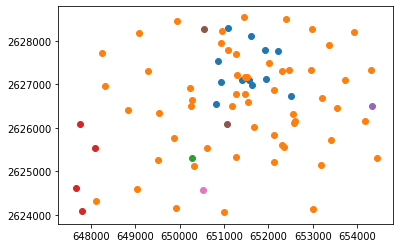

In [754]:
les_centres, l_affectation = kmoyennes(10, data_ss_double, 0.05, 10,0.5*exp(16))
affiche_resultat(data_ss_double,les_centres,l_affectation)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


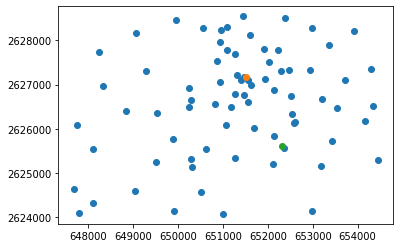

In [804]:
#avec d/comp
gamma=2*exp(16)
les_centres, l_affectation = kmoyennes(10, data_ss_double, 0.05, 100,gamma)
affiche_resultat(data_ss_double,les_centres,l_affectation)

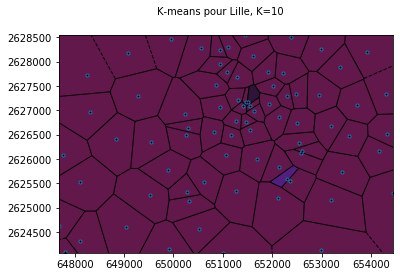

In [805]:

affichage_vor(data_ss_double,l_affectation,0,10,"K-means pour Lille, K=10")

0
1
2
3
4
5
6
7
8
9
10
11
12


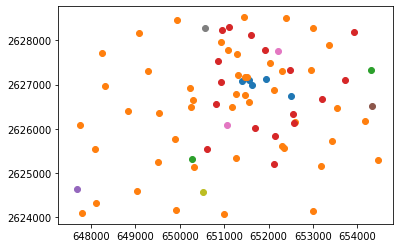

In [801]:
#avec dist gama
gamma=0.5*exp(16)
les_centres, l_affectation = kmoyennes(10, data_ss_double, 0.05, 100,gamma)
affiche_resultat(data_ss_double,les_centres,l_affectation)

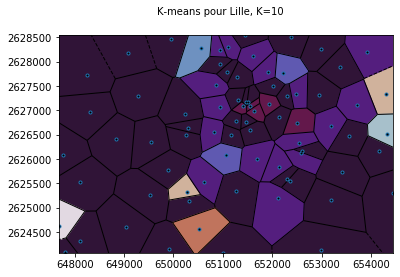

In [802]:
#avec dist gamma=0.5*exp(16)
affichage_vor(data_ss_double,l_affectation,0,10,"K-means pour Lille, K=10")